In [2]:
from astropy import table
import numpy as  np
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.io import ascii
import pylab as py
import zipfile
from astropy.stats import LombScargle
import os
import os.path
import scipy
import statistics
from scipy.optimize import curve_fit
import scipy.optimize as optimization

%matplotlib inline

In [3]:
imported_macho_lightcurves = os.listdir("for_tara")
macho_data = []

for curve in imported_macho_lightcurves:
    with open(os.path.join("for_tara", curve), "r") as src_file:
        data = src_file.read()
        macho_data.append(data) 

In [22]:
quasars = [macho_data[2594],macho_data[4523],macho_data[1050],macho_data[510]]


In [5]:
# ~54 min run time 
# 
curves = list(macho_data)
candidates = []
periods = []
non_varying = []

for i in range (0,4789):
    lc = Table.read(curves[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    error = lc['col8']
    m = (rMag > -20) & (error<2)

    oMag = rMag[m]
    otime = time[m]
    lb= 0.2
    ub= 12
    nfreq=200000
    ofreq=np.linspace(lb, ub, nfreq)
    opower = LombScargle(otime, oMag).power(ofreq)
    power= opower[((ofreq%1)<0.95) & ((ofreq%1)>0.05)]
    freq= ofreq[((ofreq%1)<0.95) & ((ofreq%1)>0.05)]
    if np.max(power)>0.35:
        periods.append(curves[i])
        
    avmag = np.mean(rMag[m])
    chi2 = np.sum((rMag[m] - avmag)**2/(error[m]**2))
    reduced_chi2 = (chi2)/(len(rMag[m])-1)
    if reduced_chi2 < 3:
        non_varying.append(curves[i])

In [7]:
len(periods)
len(non_varying)

0

In [51]:
candidates = curves
non_quasars = []

for curve in non_varying:
    non_quasars.append(curve)
for curve in periods:
    non_quasars.append(curve)

for i in candidates[:]:
    if i in non_quasars:
        candidates.remove(i)
    '''
    now all quasars and candidates fall are in the candidates list
    '''
# it went through!!!!!!!!!!

In [5]:
#55 min run time
curves = list(macho_data)
candidates = []
periods = []
non_varying = []

for i in range (0,4789):
    lc = Table.read(curves[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    error = lc['col8']
    m = (rMag > -20) & (error<2)

    oMag = rMag[m]
    otime = time[m]
    lb= 0.2
    ub= 12
    nfreq=200000
    ofreq=np.linspace(lb, ub, nfreq)
    opower= LombScargle(otime, oMag).power(ofreq)
    power= opower[((ofreq%1)<0.95) & ((ofreq%1)>0.05)]
    freq= ofreq[((ofreq%1)<0.95) & ((ofreq%1)>0.05)]
    if np.max(power)>0.35 and len(time[m])>50:
        periods.append(curves[i])
        
    avmag = np.mean(rMag[m])
    chi2 = np.sum((rMag[m] - avmag)**2/(error[m]**2))
    reduced_chi2 = (chi2)/(len(rMag[m])-1)
    if reduced_chi2 < 3 and len(time[m])>50:
        non_varying.append(curves[i])

/Users/tac1998/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


In [6]:
candidates = curves
non_quasars = []
baddata = []

for curve in non_varying:
    non_quasars.append(curve)
for curve in periods:
    non_quasars.append(curve)

for curve in candidates:
    lc = Table.read(curve, data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    error = lc['col8']
    m = (rMag > -20) & (error<2)
    if len(time[m]) < 50:
        baddata.append(curve)    
    
for i in candidates[:]:
    if i in non_quasars:
        candidates.remove(i)
for i in candidates[:]:
    if i in baddata:
        candidates.remove(i)

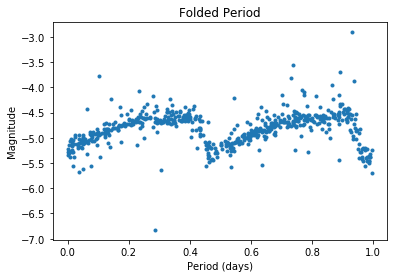

In [21]:
lc = Table.read(periods[1], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
error = lc['col8']
m = (rMag > -20) & (error<2)


oMag = rMag[m]
otime = time[m]
lb= 0.2
ub= 12
nfreq=200000
ofreq=np.linspace(lb, ub, nfreq)
opower = LombScargle(otime, oMag).power(ofreq)
power= opower[((ofreq%1)<0.95) & ((ofreq%1)>0.05)]
freq= ofreq[((ofreq%1)<0.95) & ((ofreq%1)>0.05)]

bestpeak=np.argmax(power)
bestfreq=freq[bestpeak]
p=2/bestfreq


foldTimes = time[m] / p
foldTimes = foldTimes % 1   
plt.plot(foldTimes,rMag[m],linestyle='none',marker='.')
plt.title("Folded Period")
plt.xlabel("Period (days)")
plt.ylabel("Magnitude")
plt.show() 


/Users/tac1998/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


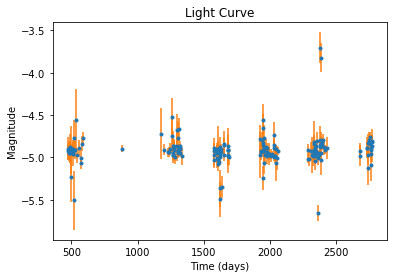

1.90047823399


In [18]:
lc = Table.read(non_varying[2], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
error = lc['col8']
m = (rMag > -20) & (error<2)

plt.plot(time[m], rMag[m],'.')
plt.errorbar(time[m], rMag[m], error[m], fmt= None)
plt.title("Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude")
plt.show()

avmag = np.mean(rMag[m])
chi2 = np.sum((rMag[m] - avmag)**2/(error[m]**2))
reduced_chi2 = (chi2)/(len(rMag[m])-1)
print(reduced_chi2)

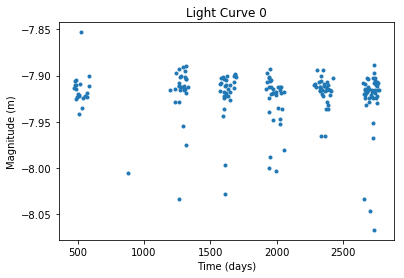

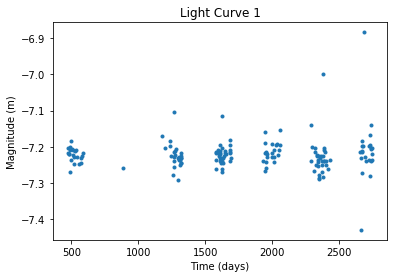

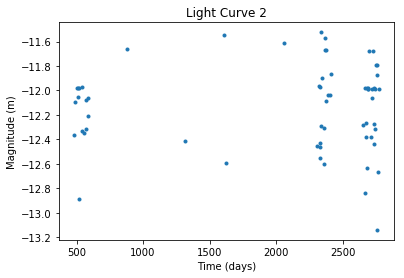

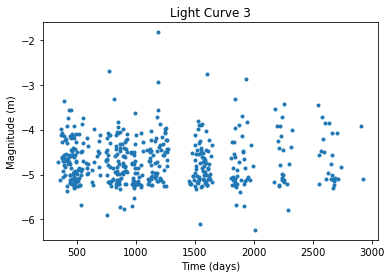

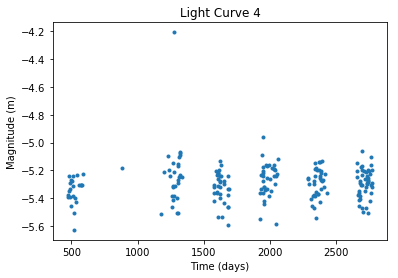

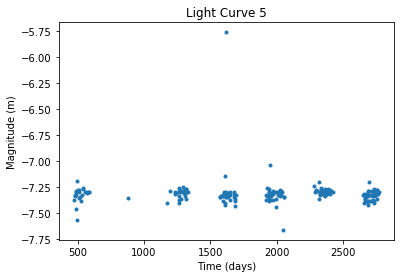

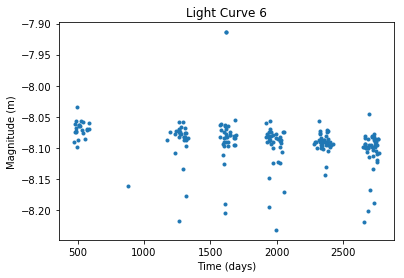

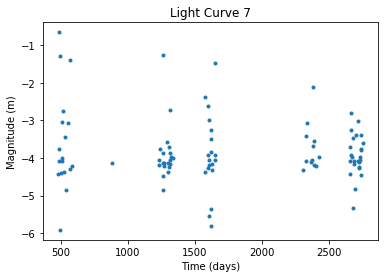

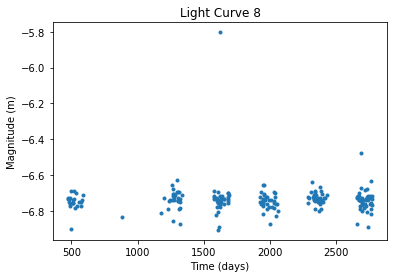

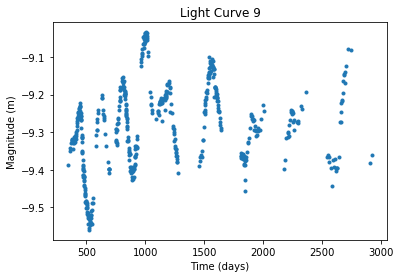

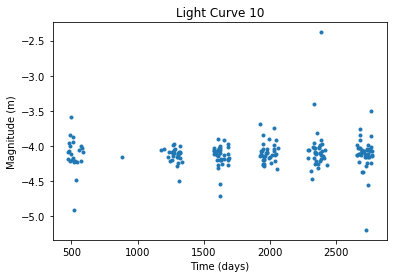

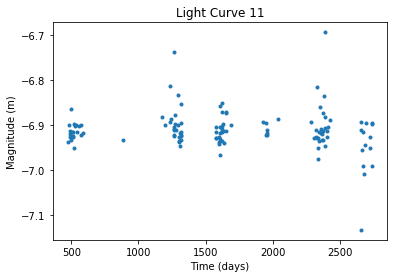

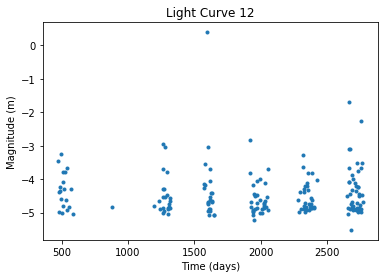

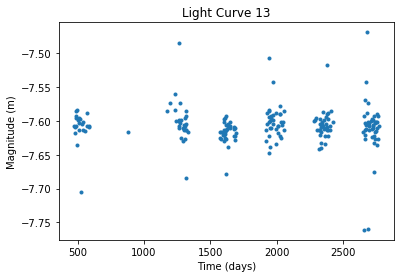

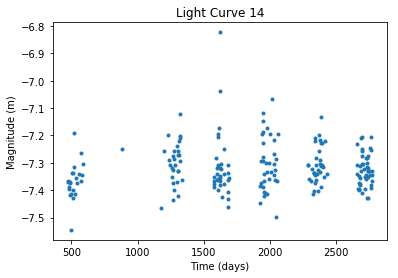

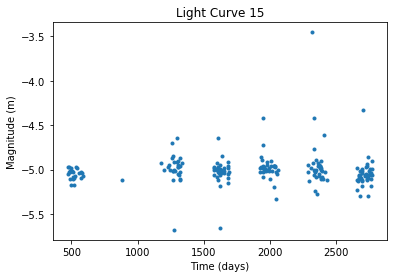

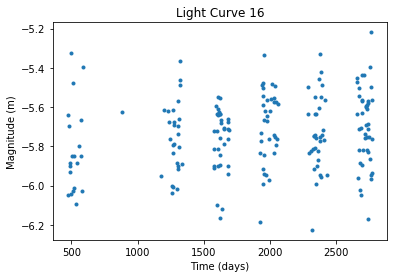

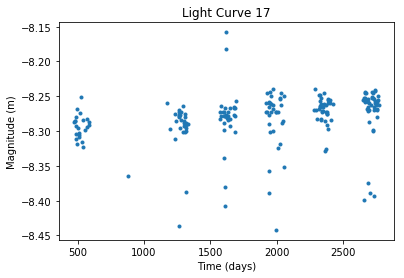

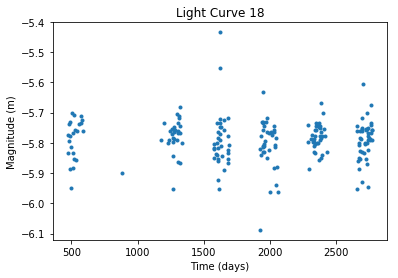

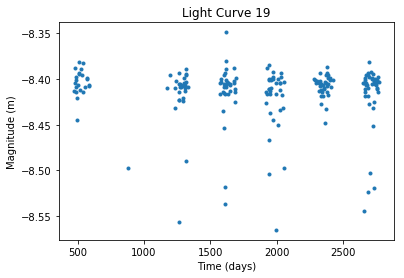

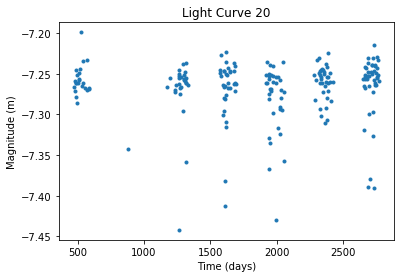

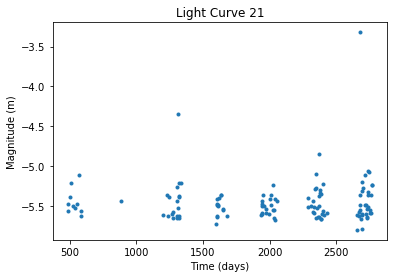

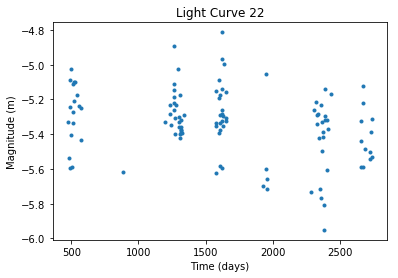

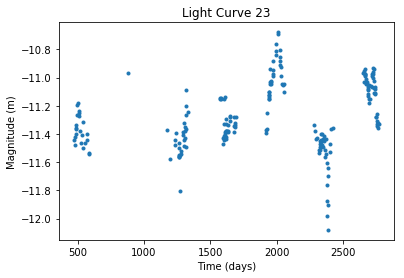

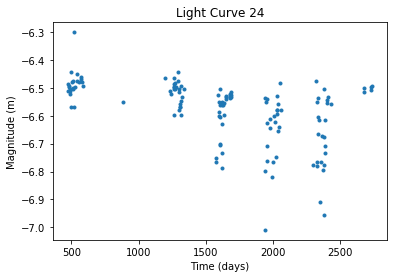

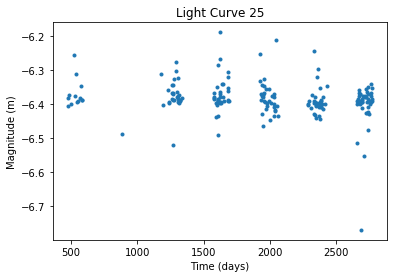

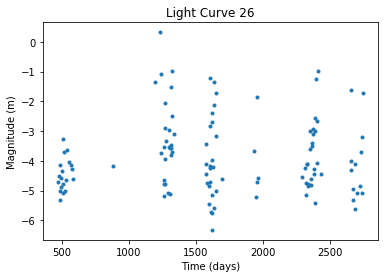

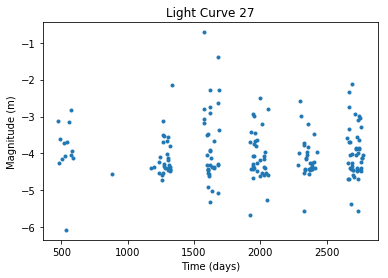

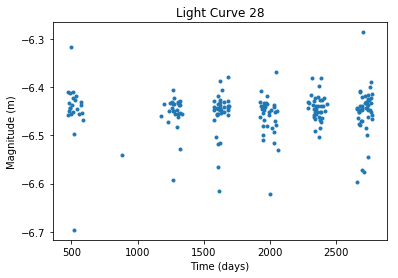

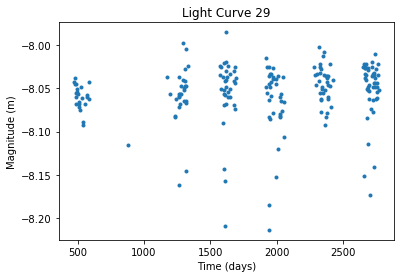

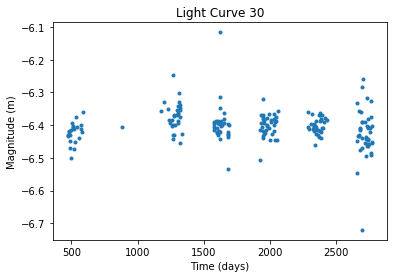

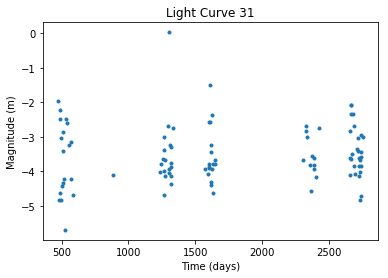

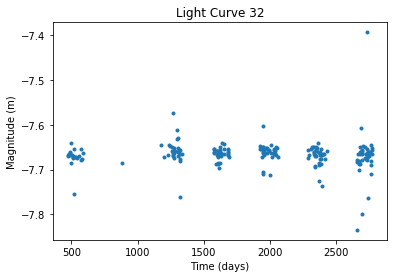

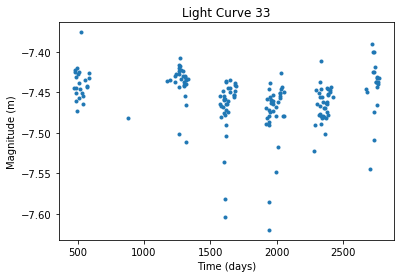

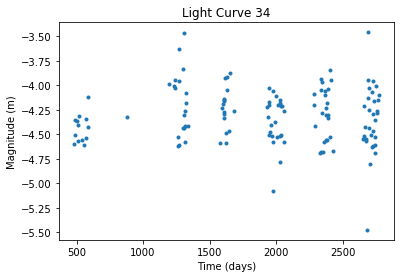

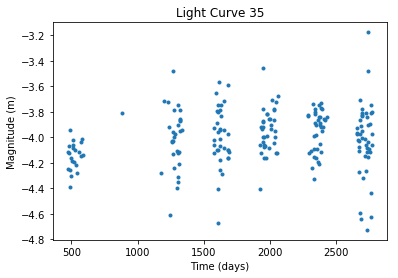

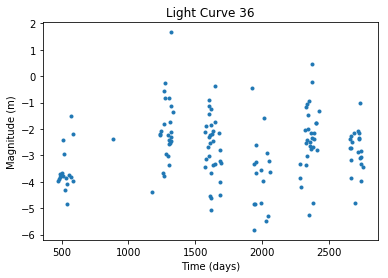

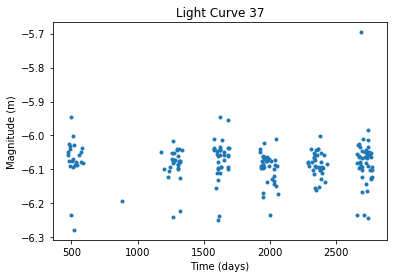

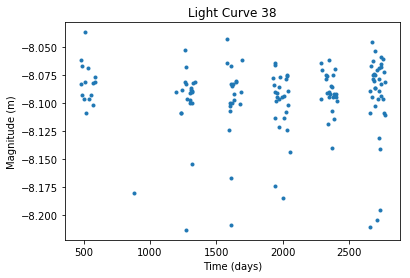

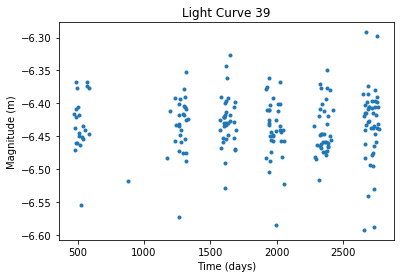

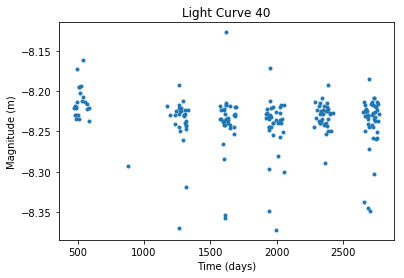

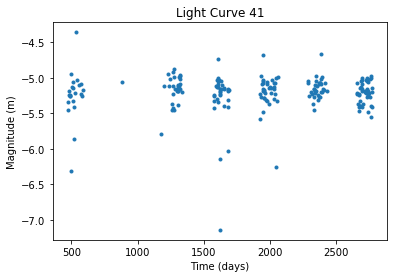

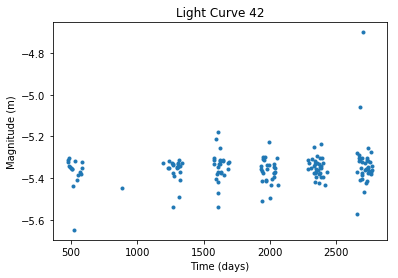

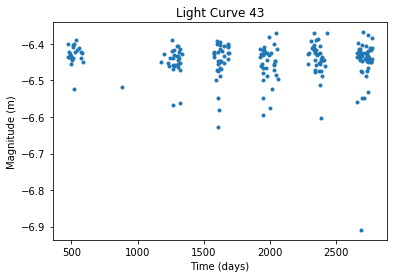

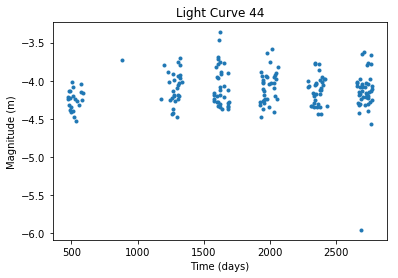

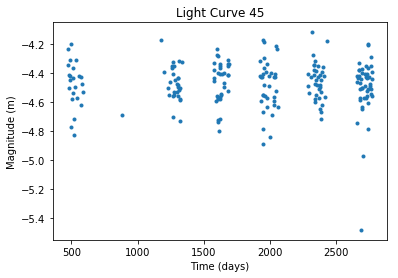

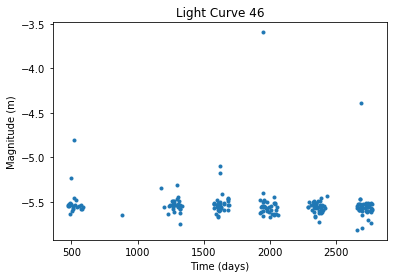

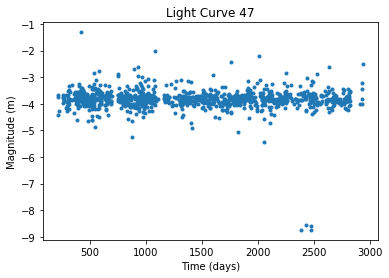

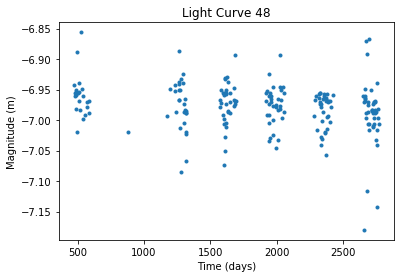

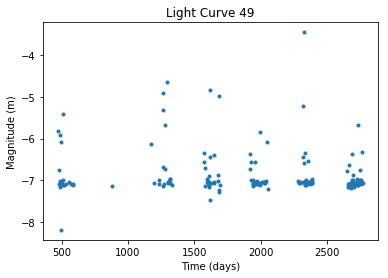

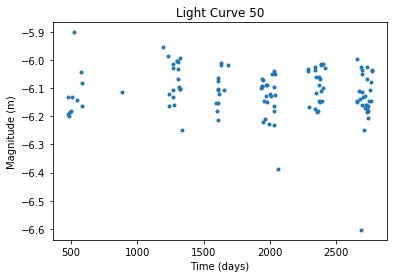

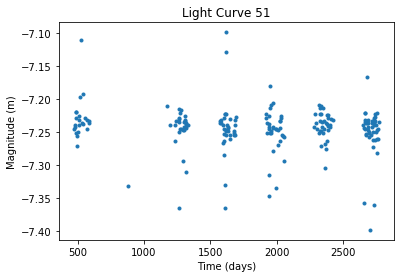

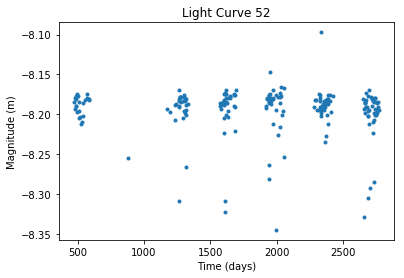

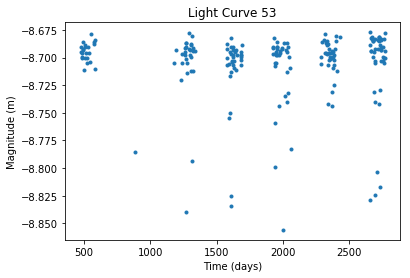

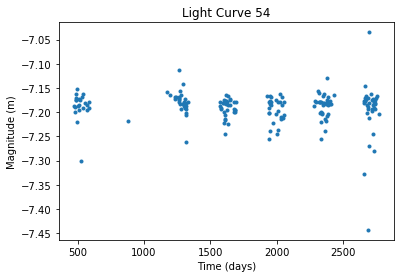

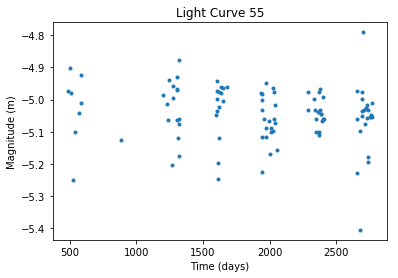

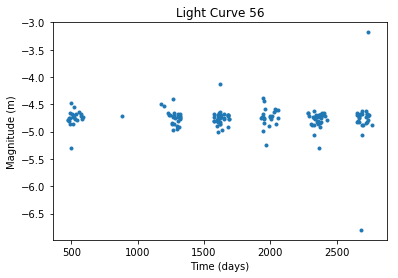

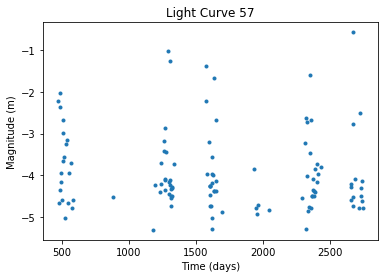

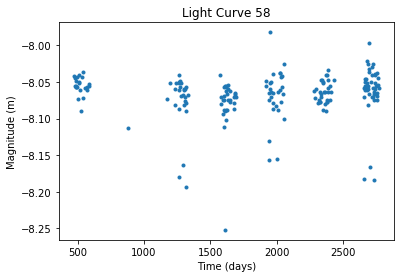

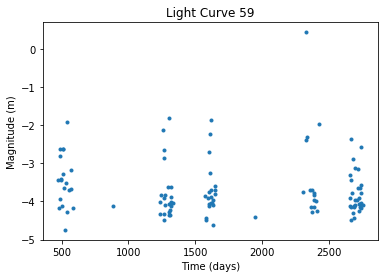

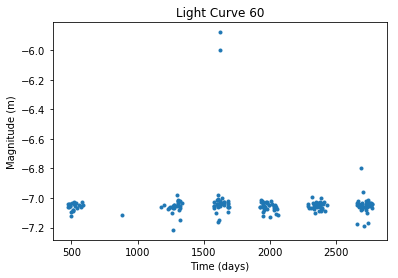

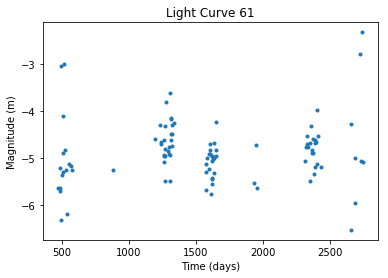

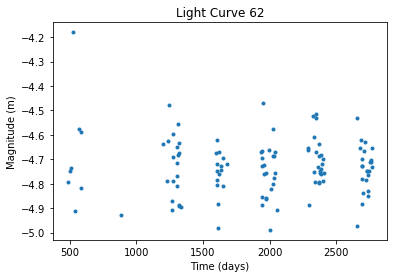

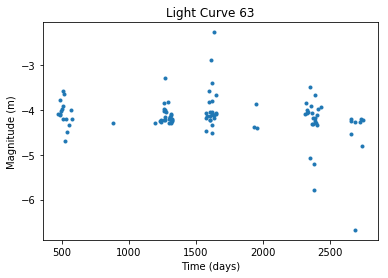

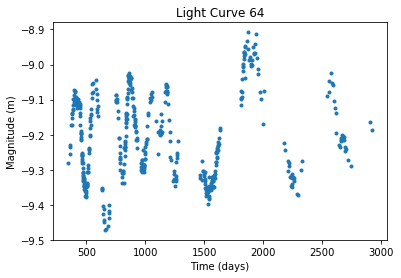

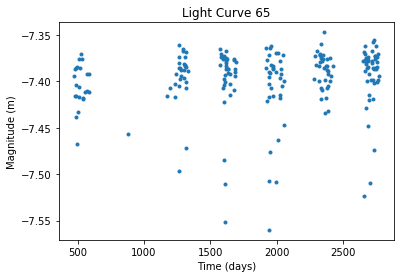

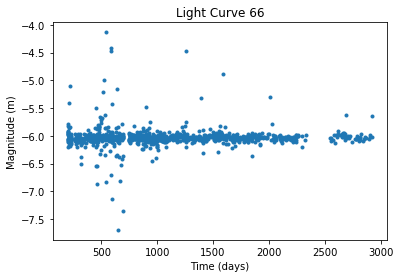

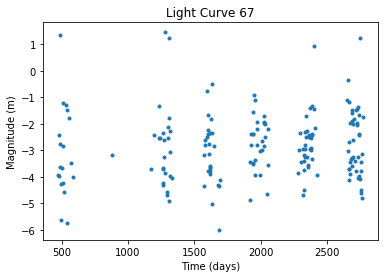

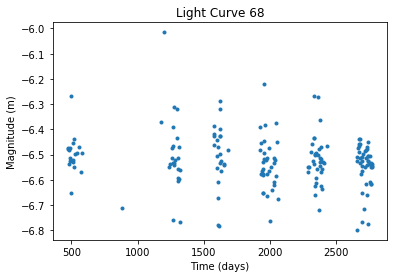

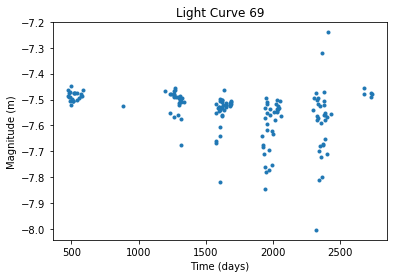

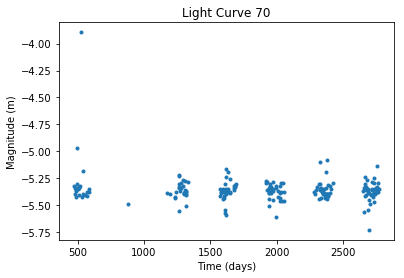

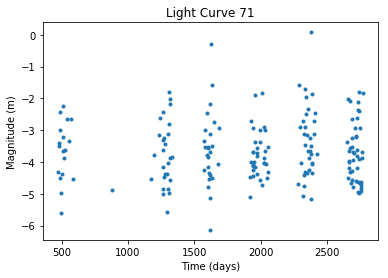

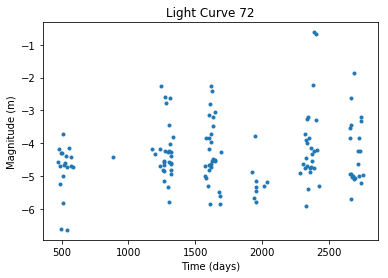

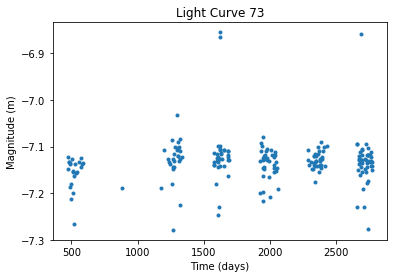

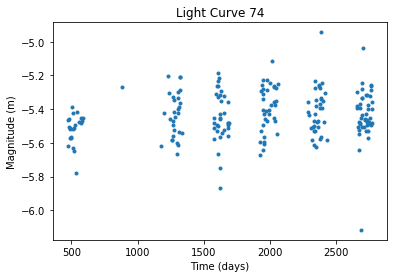

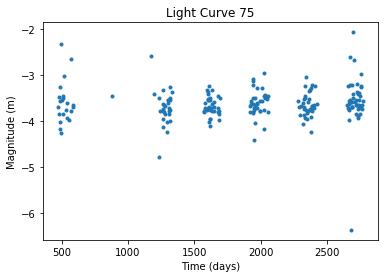

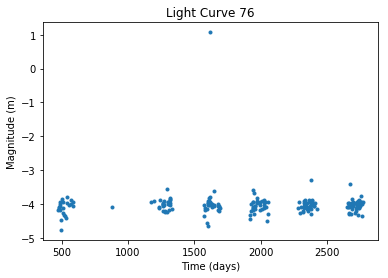

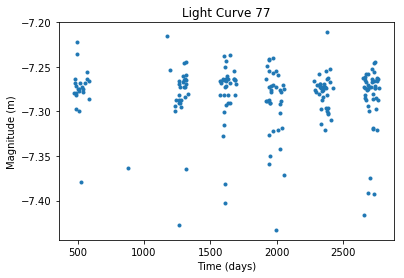

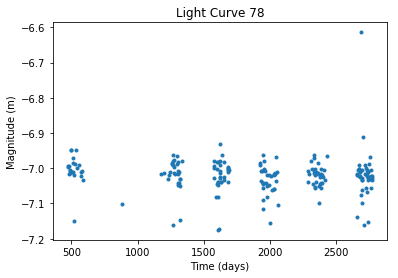

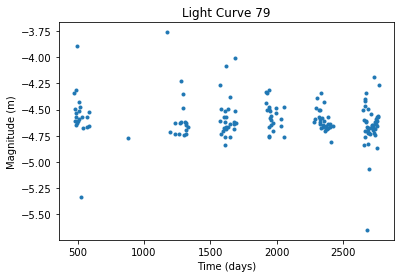

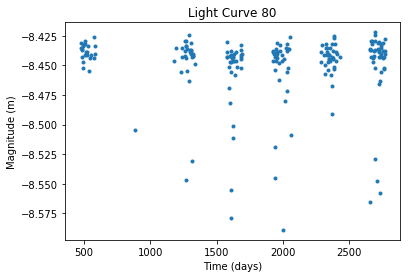

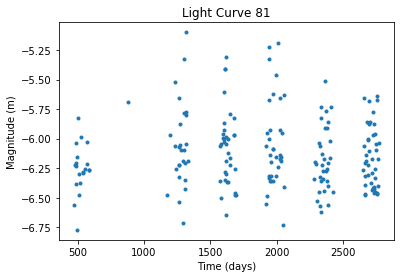

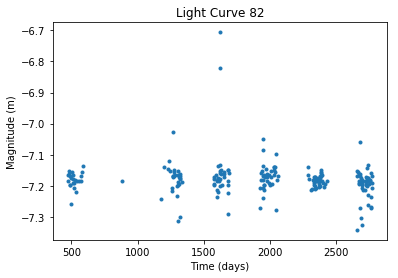

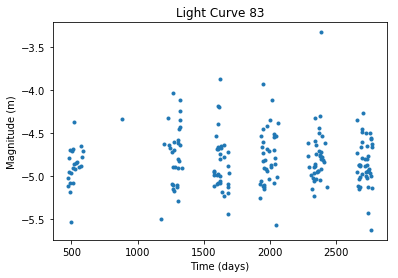

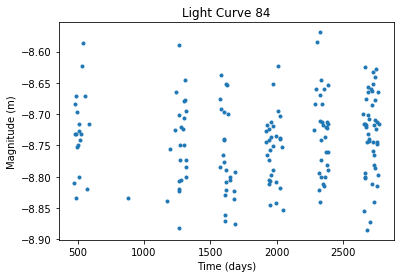

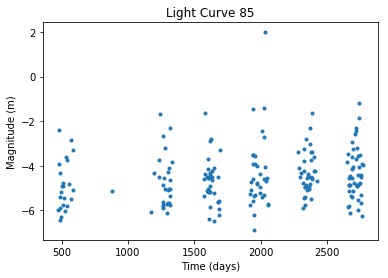

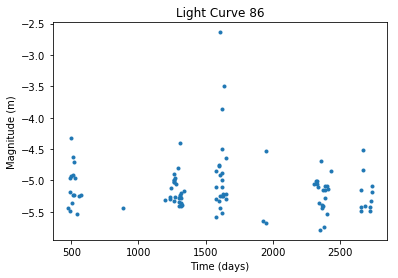

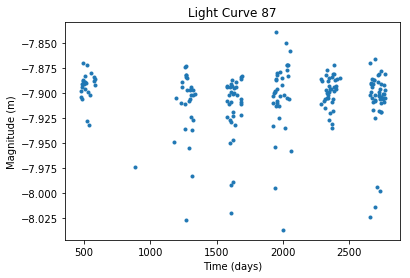

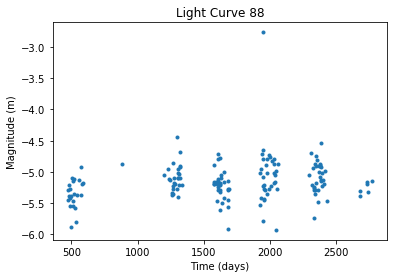

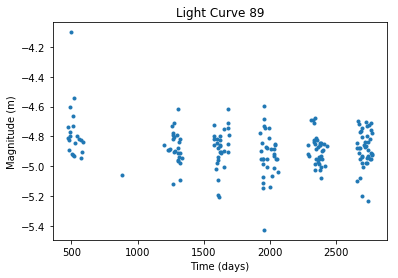

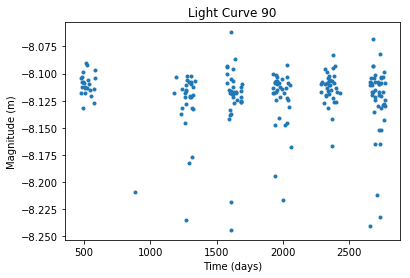

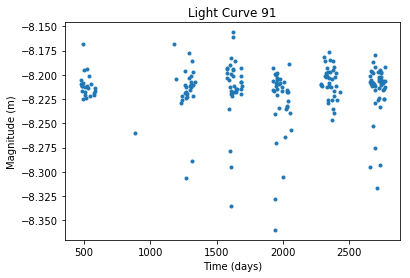

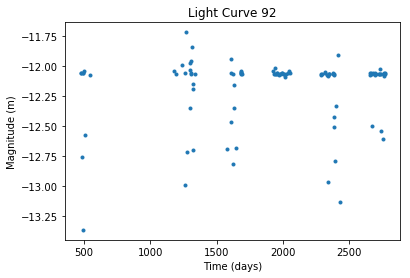

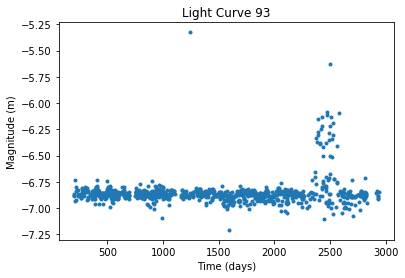

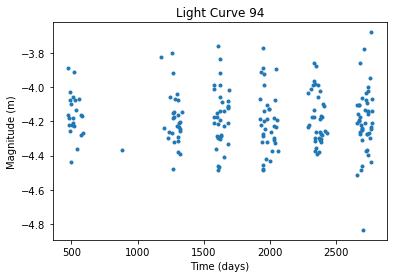

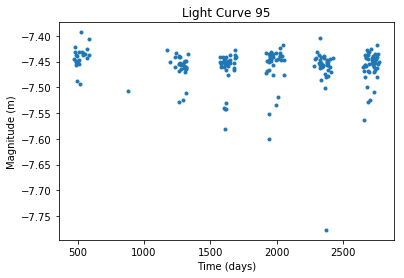

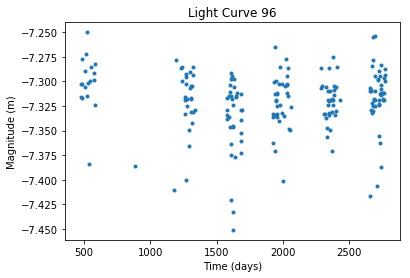

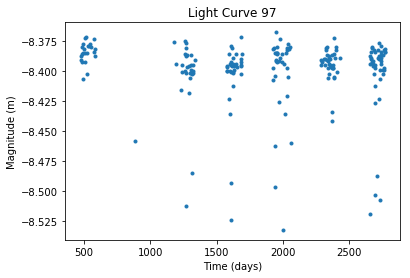

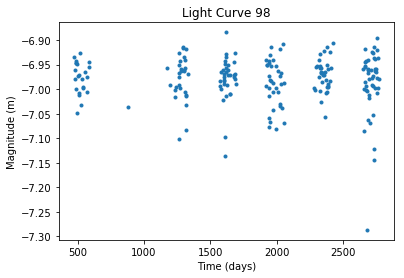

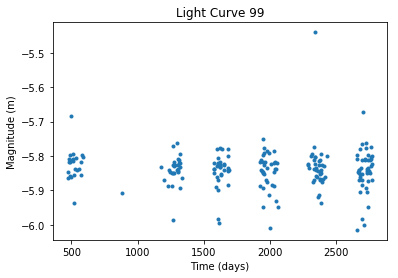

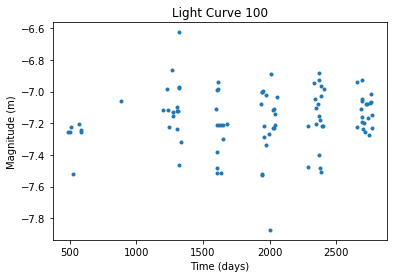

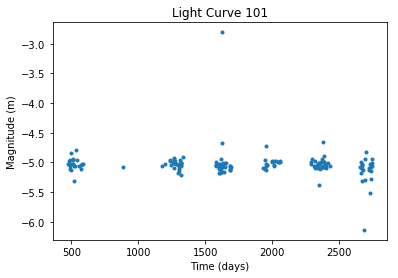

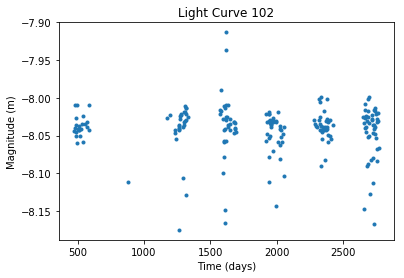

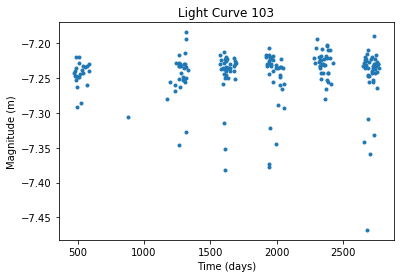

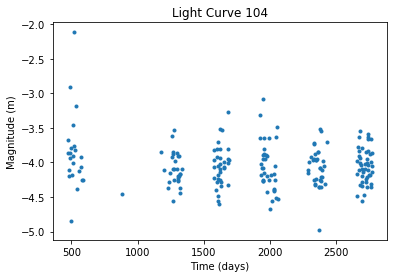

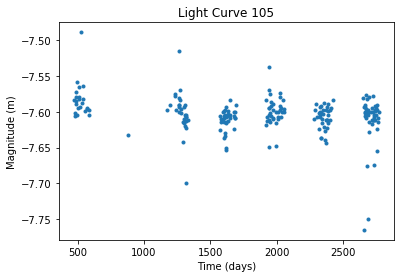

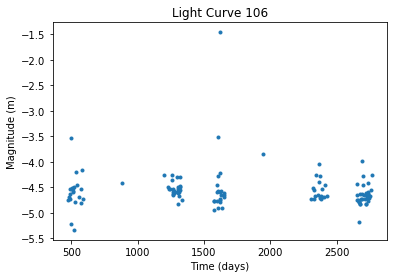

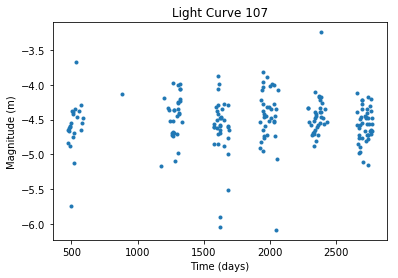

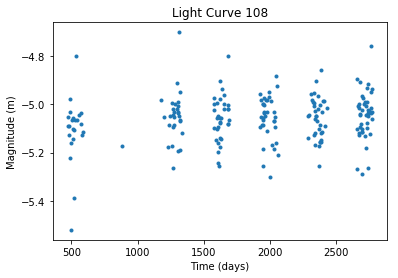

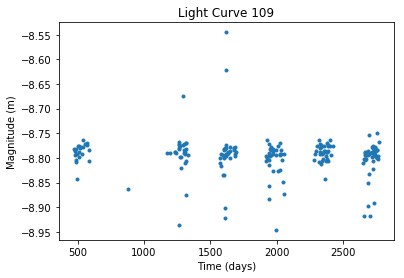

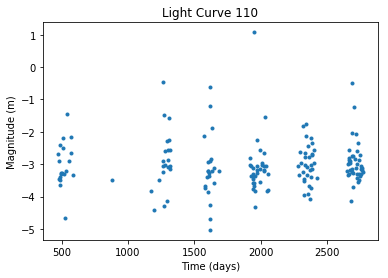

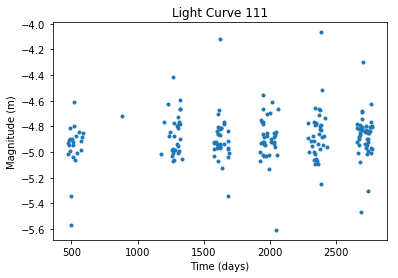

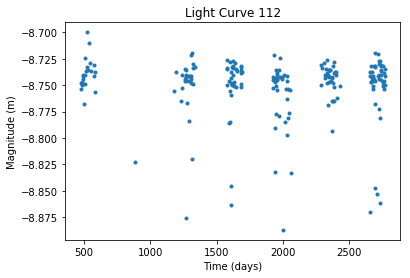

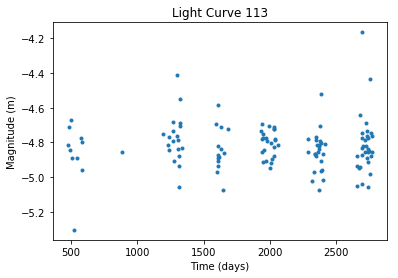

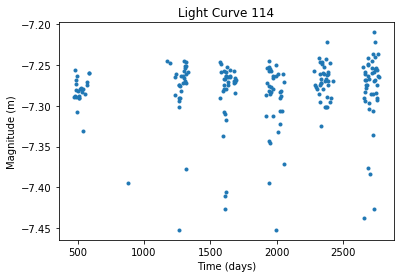

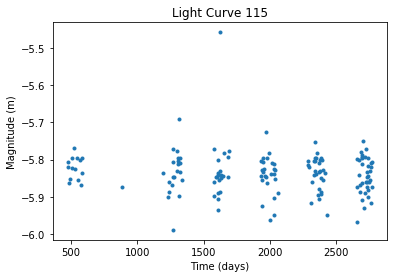

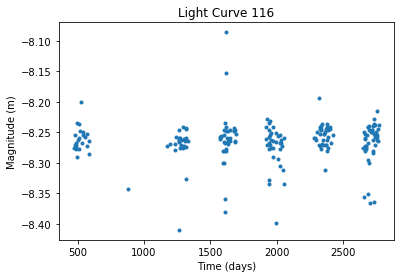

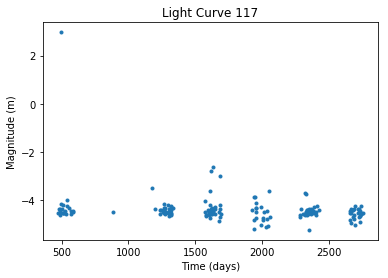

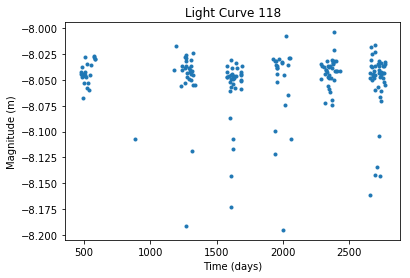

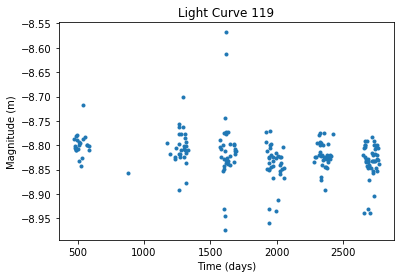

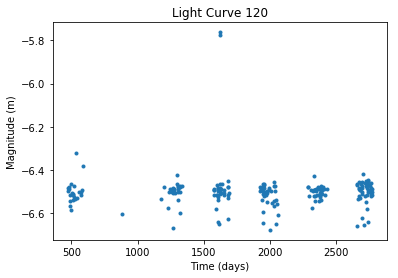

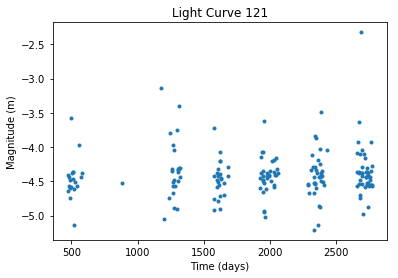

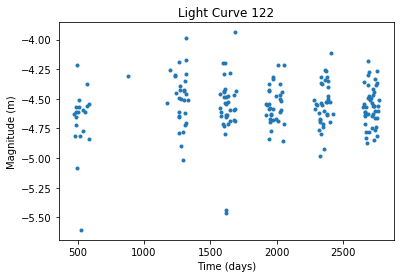

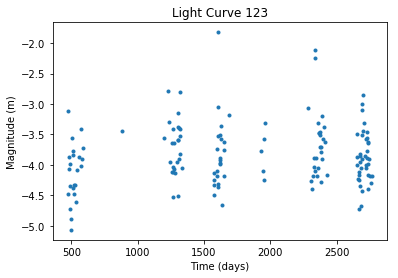

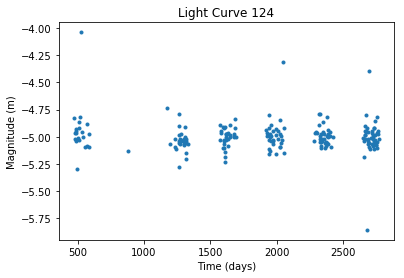

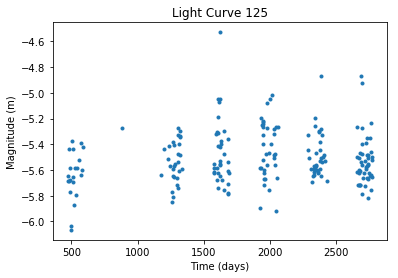

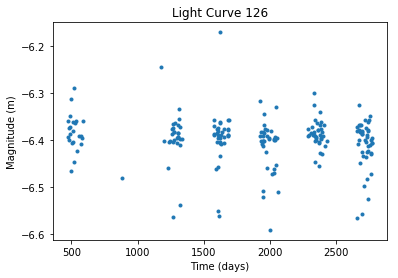

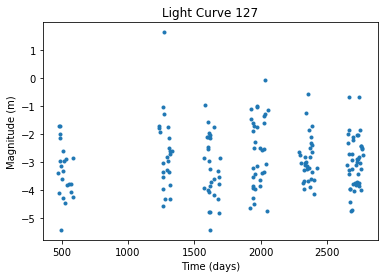

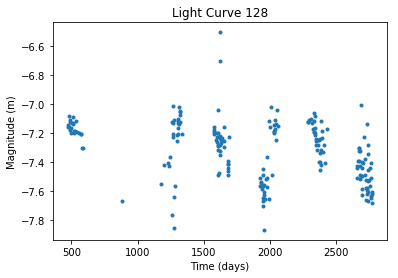

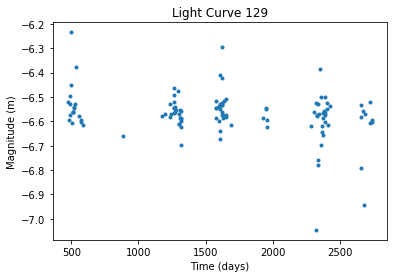

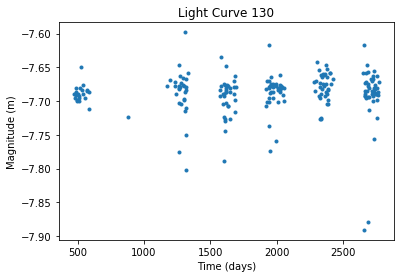

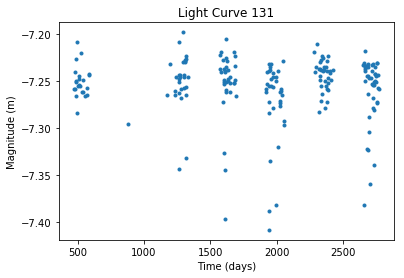

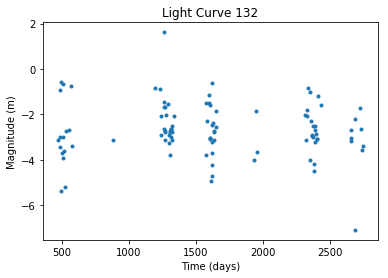

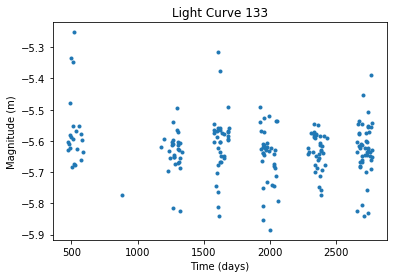

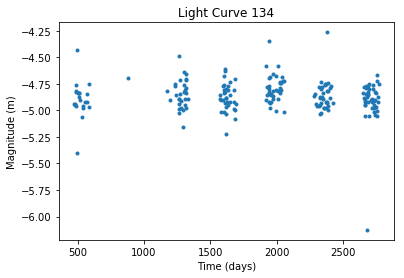

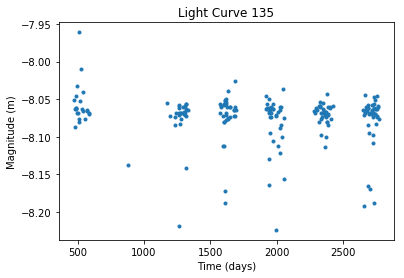

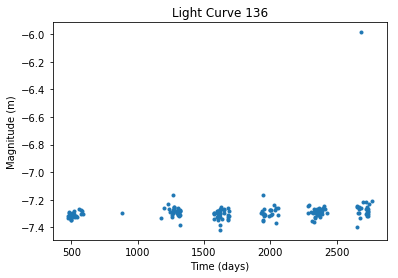

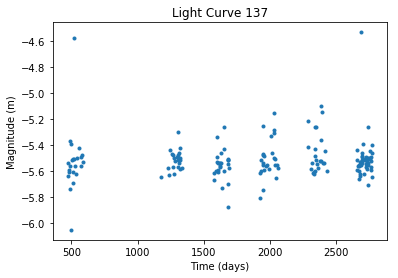

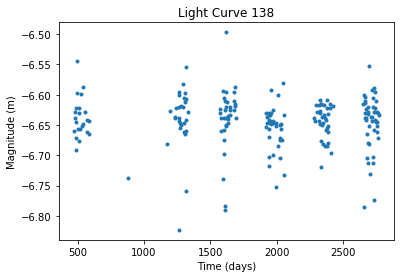

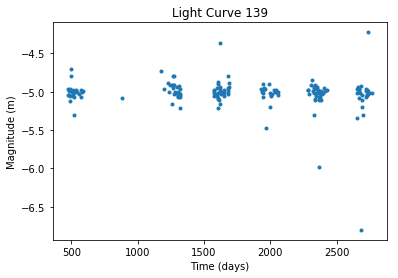

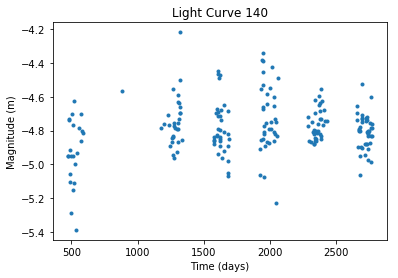

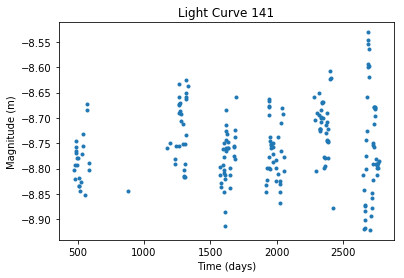

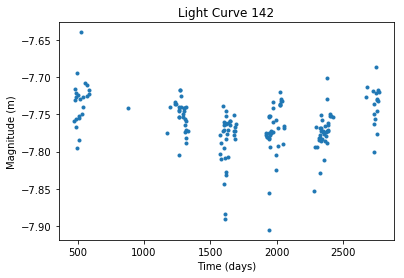

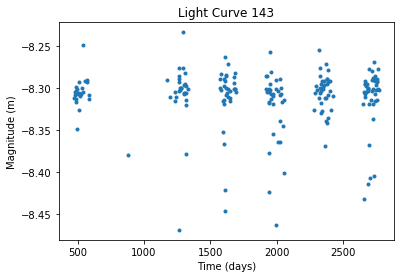

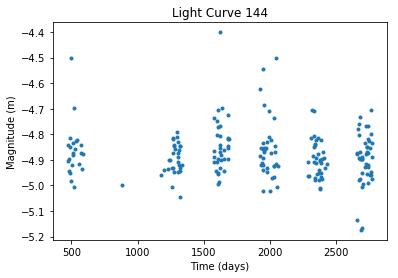

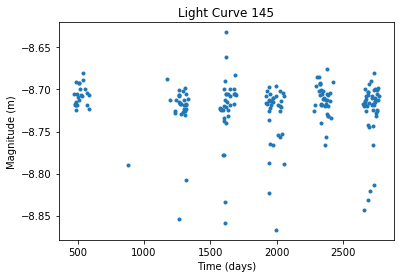

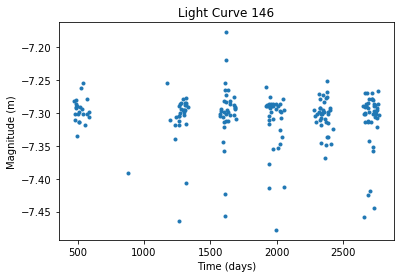

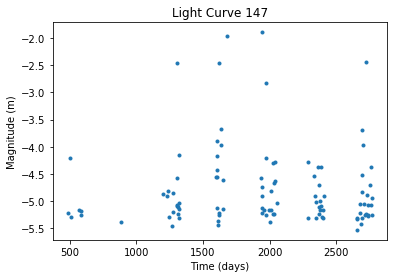

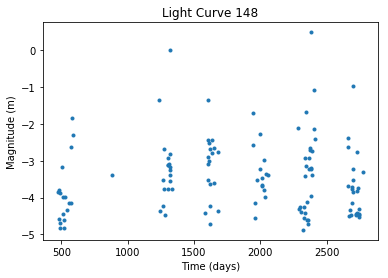

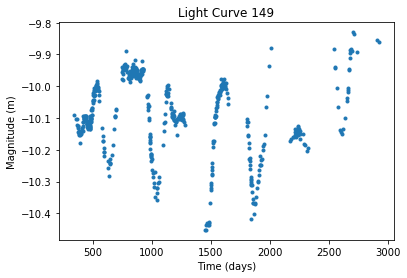

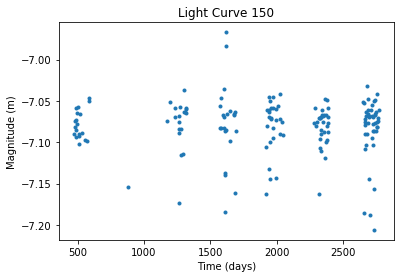

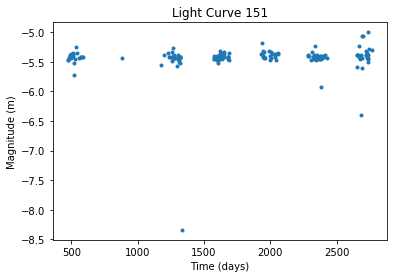

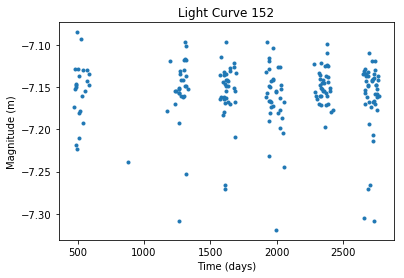

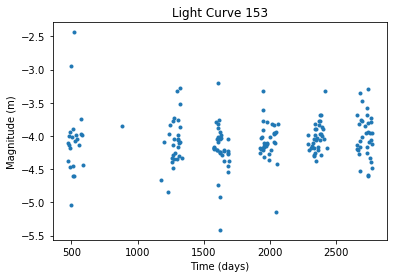

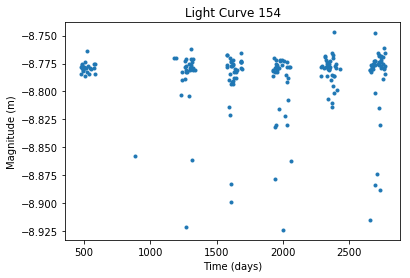

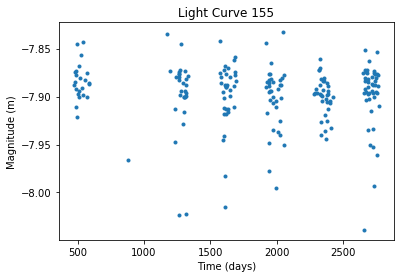

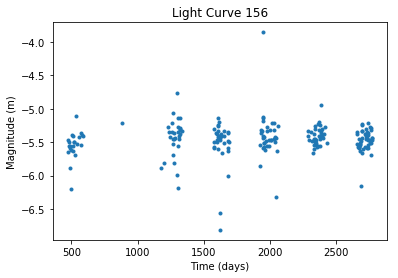

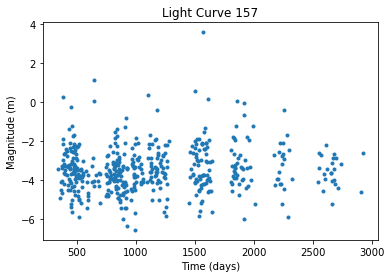

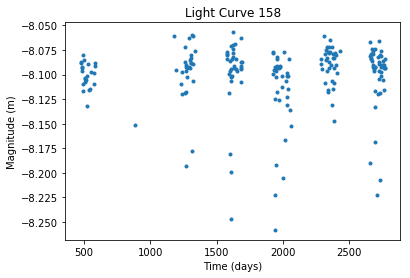

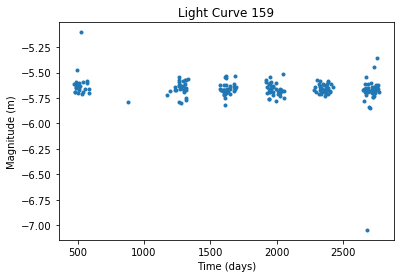

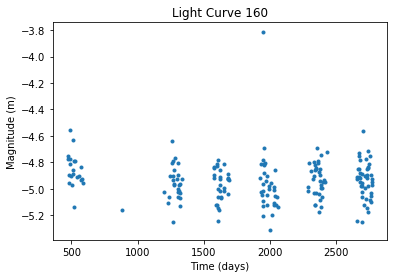

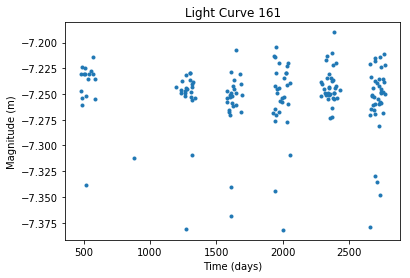

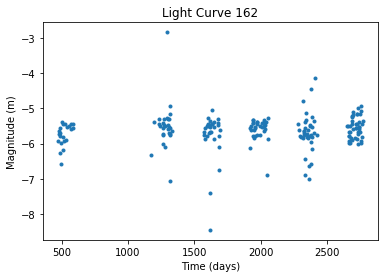

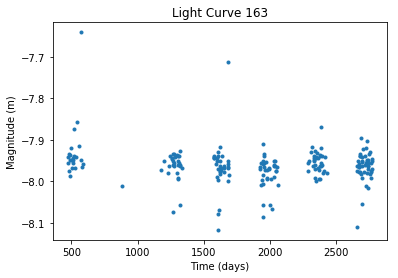

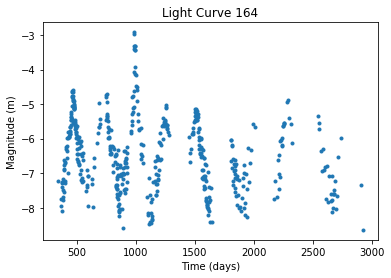

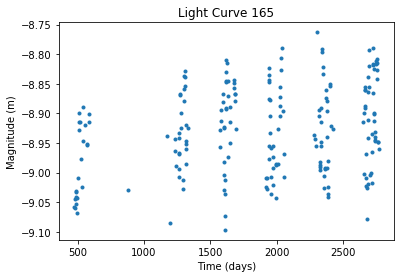

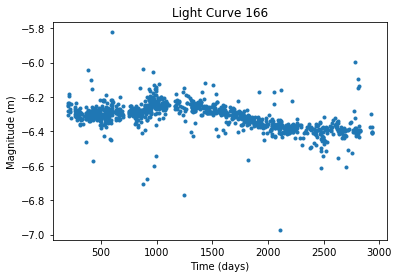

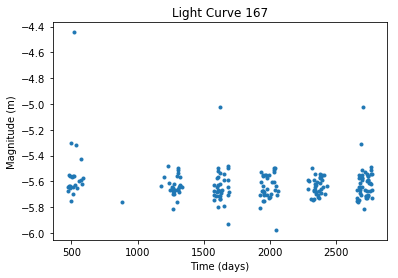

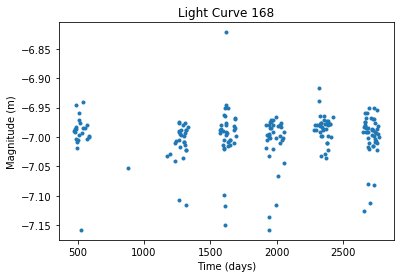

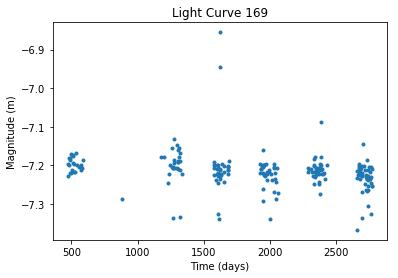

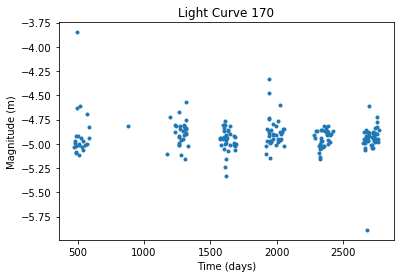

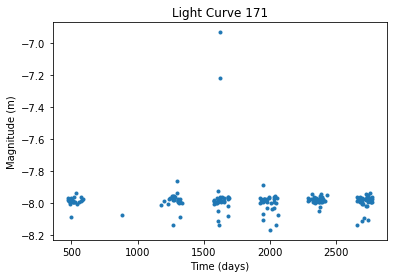

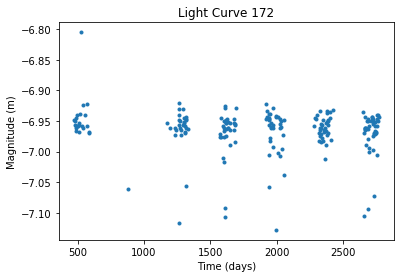

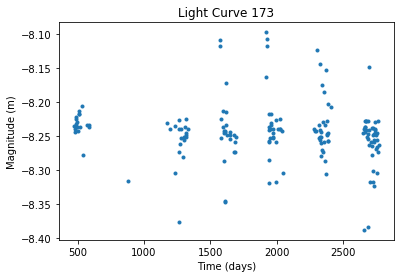

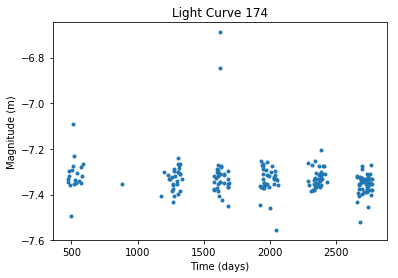

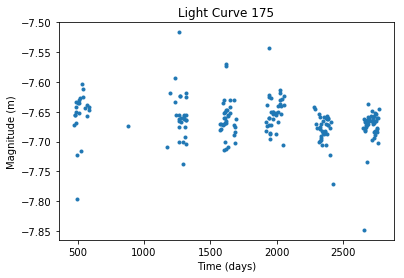

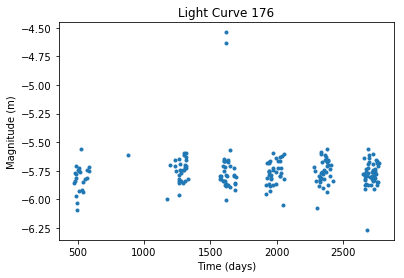

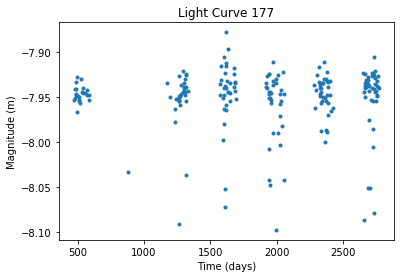

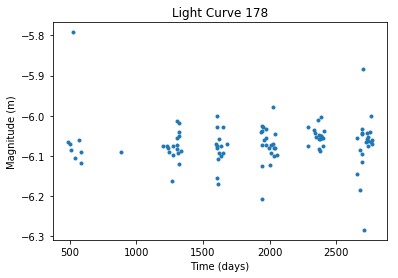

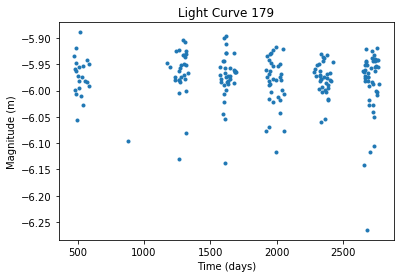

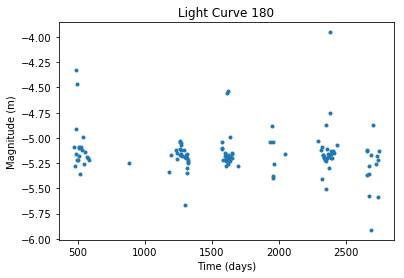

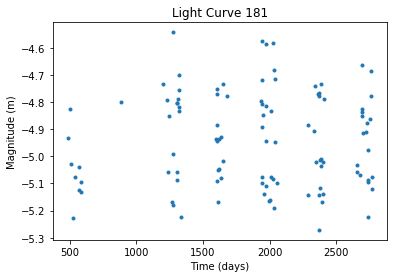

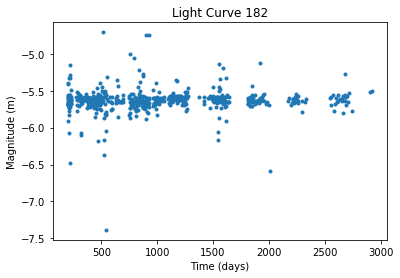

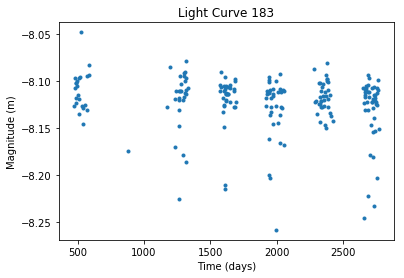

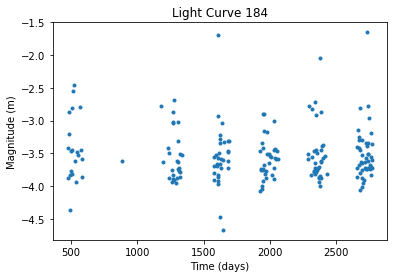

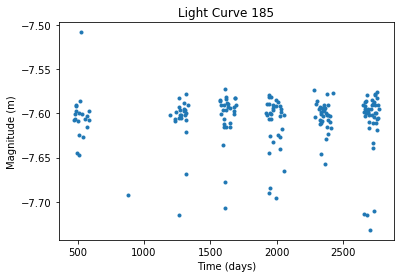

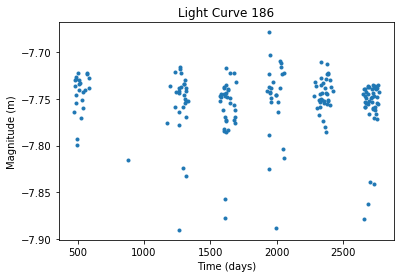

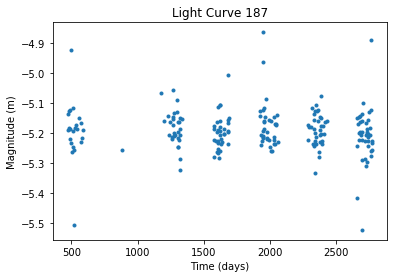

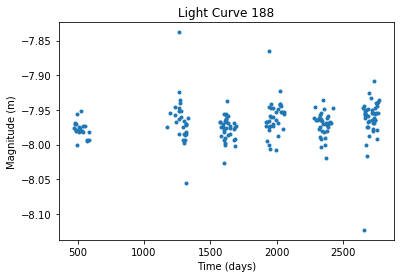

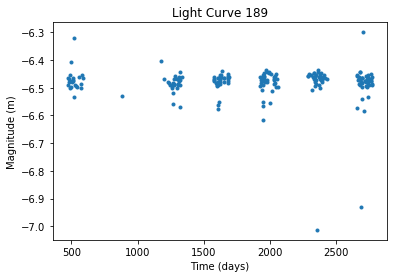

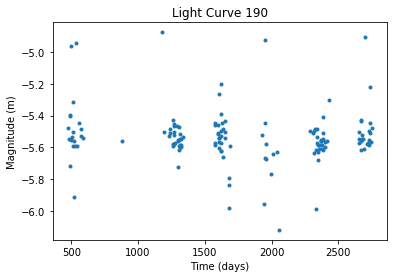

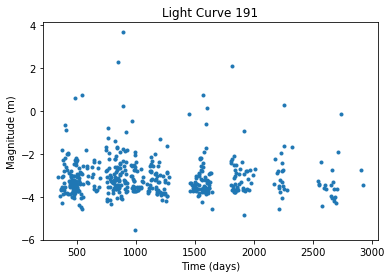

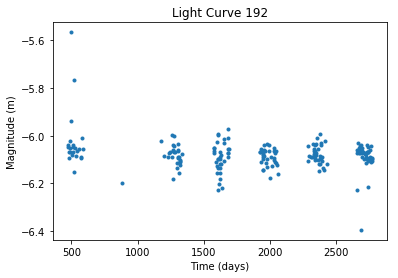

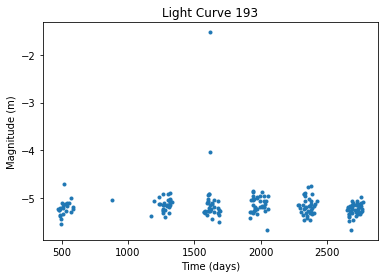

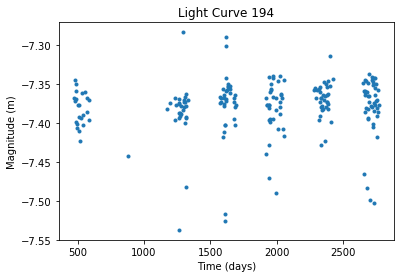

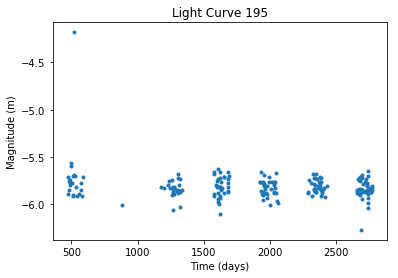

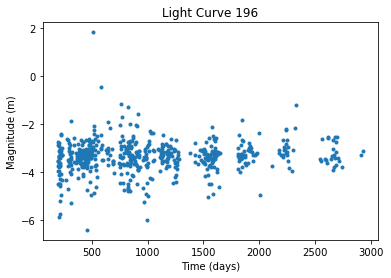

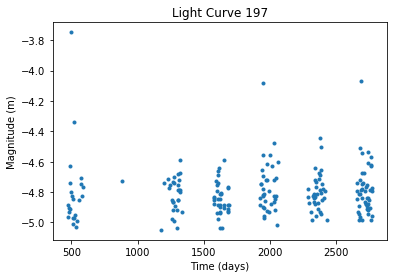

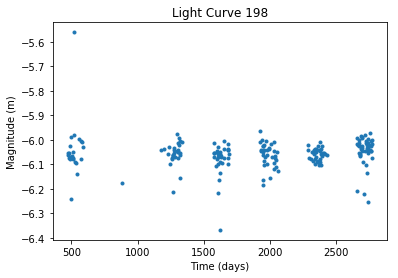

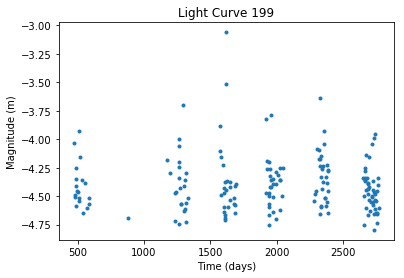

In [141]:
for i in range (0,200):
    lc = Table.read(candidates[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    error = lc['col8']
    m = (rMag > -20) & (error<2)

    plt.plot(time[m], rMag[m],'.')
    plt.title("Light Curve %s" %(i))
    plt.xlabel("Time (days)")
    plt.ylabel("Magnitude")
    plt.show()

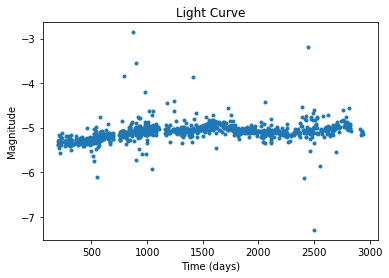

In [25]:
lc = Table.read(quasars[0], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
error = lc['col8']
m = (rMag > -20) & (error<2)
    
plt.plot(time[m], rMag[m],'.')
plt.title("Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude")
plt.show()


In [26]:
quasars[0]

'!  Star 9.4641.568                         RA  05 08 45.954   DEC  -70 05 00.92\n#  1114 observations from the production databases\n#  Field inception date: 1094.0417\n#  Pixel coordinate system: amp\n#\n#  Template         magnitude        chip coordinates        west-chunk\n#     Red:            -5.312         1078.92, 1771.98             13\n#    Blue:            -5.235         1066.13, 1730.47             88\n#\n!         Date    Obsid    Pier    Exposure     Checklist      Airmass             rMag   rErr  rDS rTF rCP rX2 rMP rCR  rA  rXpix  rYpix  rSky  rFWHM  rTobs r    bMag   bErr  bDS bTF bCP bX2 bMP bCR  bA  bXpix  bYpix  bSky  bFWHM  bTobs b  \n      200.6909      287    West         300       0x101bf       1.9728           -5.359  0.116   27   1  88 124  73  75   2  828.0  804.3 11550  6.101   2956 1  -4.700  1.380    0   5  95  15   0   0  12  205.3  235.2   441  6.186   2956 1  \n      201.6956      324    West         300       0x101bf       1.9321           -5.310  0.0